In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import sympy as sp
import numpy as np
np.set_printoptions(suppress=True)
from tqdm import tqdm

d:\Develop\Anaconda3\envs\py38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\Develop\Anaconda3\envs\py38\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
d:\Develop\Anaconda3\envs\py38\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### 情景1

In [2]:
data = pd.read_csv(r"E:\参加点比赛\数模研赛\data\碳排预测数据.csv")
print(data.columns)
system = data.copy()

# 假设条件下拟合得到人口、经济与时间的关系式
##############################################################################################################################################
print("假设条件下拟合得到人口、经济与时间的关系式"+"-"*100)
# 对人口做拟合
# 做多项式拟合
x = system['时间'].values.tolist()
P = system['常驻人口总量'].values.tolist()
def fit_p_poly(x, a, b, c):
    return a * x**2 + b * x + c
params, convariance = curve_fit(fit_p_poly, x, P)
a, b, c = params
x = sp.symbols('x')
predict_p_poly = a * x**2 + b * x + c
print("人口关于时间的多项式回归预测函数 = {}".format(predict_p_poly))
# 做线性拟合
x = system['时间'].values.tolist()
P = system['常驻人口总量'].values.tolist()
def fit_p_linear(x, a, b): 
    return a * x + b
params, convariance = curve_fit(fit_p_linear, x, P)
a, b = params
x = sp.symbols('x')
predict_p_linear = a * x + b 
print("人口关于时间的线性回归预测函数 = {}".format(predict_p_linear))
# 组合预测
predict_p = 0.8 * predict_p_linear + 0.2 * predict_p_poly
print("人口关于时间的组合预测函数 = {}".format(predict_p))

# 对经济做拟合：满足给定条件
x = system['时间'].values.tolist()
GDP = system['区域生产总值'].values.tolist()
x = x + [2035, 2060]
GDP = GDP + [2*GDP[-1], 4*GDP[-1]]
def fit_gdp(x, a, b): # 拟合函数
    return a * x + b
params, convariance = curve_fit(fit_gdp, x, GDP) # 将x、GDP放入fit_gdp中拟合
a, b = params # 获取拟合参数
x = sp.symbols('x') 
predict_gdp = a * x + b # 获取拟合方程式
print("经济关于时间的线性回归预测函数 = {}".format(predict_gdp))
print("gdp(x) = {}".format(predict_gdp))
print("p(x) = {}".format(predict_p))


# 多元线性回归 得到五种能源与人口、经济关系
##############################################################################################################################################
print("多元线性回归 得到五种能源与人口、经济关系"+"-"*100)
# 选择自变量与应变量
GDPP = system.loc[:, ['区域生产总值', '常驻人口总量']].values # 自变量
EV1 = system['一次能源中化石的能源消费量'].values
EV2 = system['一次能源中非化石的能源消费量'].values
EV3 = system['二次能源的能源消费量'].values
EV4 = system['化石能源发电的能源消费量'].values
EV5 = system['非化石能源发电的能源消费量'].values

# 求解EV1关于GDP的线性回归方程
lr_EV1 = LinearRegression()
lr_EV1.fit(GDPP, EV1)
coef_EV1 = lr_EV1.coef_
intercept_EV1 = lr_EV1.intercept_
R2_EV1 = lr_EV1.score(GDPP, EV1)
print("EV1")
print("相关系数 = ", coef_EV1)
print("截距 = ", intercept_EV1)
print("R2 = ", R2_EV1)

# 求解EV2关于GDP的线性回归方程
lr_EV2 = LinearRegression()
lr_EV2.fit(GDPP, EV2)
coef_EV2 = lr_EV2.coef_
intercept_EV2 = lr_EV2.intercept_
R2_EV2 = lr_EV2.score(GDPP, EV2)
print("EV2" )
print("相关系数 = ", coef_EV2)
print("截距 = ", intercept_EV2)
print("R2 = ", R2_EV2)

# 求解EV3关于GDP的线性回归方程
lr_EV3 = LinearRegression()
lr_EV3.fit(GDPP, EV3)
coef_EV3 = lr_EV3.coef_
intercept_EV3 = lr_EV3.intercept_
R2_EV3 = lr_EV3.score(GDPP, EV3)
print("EV3")
print("相关系数 = ", coef_EV3)
print("截距 = ", intercept_EV3)
print("R2 = ", R2_EV3)

# 求解EV4关于GDP的线性回归方程
lr_EV4 = LinearRegression()
lr_EV4.fit(GDPP, EV4)
coef_EV4 = lr_EV4.coef_
intercept_EV4 = lr_EV4.intercept_
R2_EV4 = lr_EV4.score(GDPP, EV4)
print("EV4" )
print("相关系数 = ", coef_EV4)
print("截距 = ", intercept_EV4)
print("R2 = ", R2_EV4)

# 求解EV5关于GDP的线性回归方程
lr_EV5 = LinearRegression()
lr_EV5.fit(GDPP, EV5)
coef_EV5 = lr_EV5.coef_
intercept_EV5 = lr_EV5.intercept_
R2_EV5 = lr_EV5.score(GDPP, EV5)
print("EV5")
print("相关系数 = ", coef_EV5)
print("截距 = ", intercept_EV5)
print("R2 = ", R2_EV5)

# 多元线性回归 得到六个部门碳排放量与五种能源消费量关系
##############################################################################################################################################
print("多元线性回归 得到六个部门碳排放量与五种能源消费量关系"+"-"*100)
# 选择自变量与应变量
Eall = system.loc[:, ['一次能源中化石的能源消费量', '一次能源中非化石的能源消费量', '二次能源的能源消费量', '化石能源发电的能源消费量',
       '非化石能源发电的能源消费量']]
CO2D1 = system['农林消费部门的碳排放量'].values
CO2D2 = system['工业消费部门的碳排放量'].values
CO2D3 = system['交通消费部门的碳排放量'].values
CO2D4 = system['建筑消费部门的碳排放量'].values
CO2D5 = system['居民生活消费部门的碳排放量'].values
CO2D6 = system['能源供应部门的碳排放量'].values
CO2 = system['碳排放量'].values

# 求解CO2D1关于五种能源的方程
lr_CO2D1 = LinearRegression()
lr_CO2D1.fit(Eall, CO2D1)
coef_CO2D1 = lr_CO2D1.coef_
intercept_CO2D1 = lr_CO2D1.intercept_
R2_CO2D1 = lr_CO2D1.score(Eall, CO2D1)
print("CO2D1")
print("相关系数 = ")
for i in coef_CO2D1:
    print(i)
print("截距 = ", intercept_CO2D1)
print("R2 = ", R2_CO2D1)

# 求解CO2D2关于五种能源的方程
lr_CO2D2 = LinearRegression()
lr_CO2D2.fit(Eall, CO2D2)
coef_CO2D2 = lr_CO2D2.coef_
intercept_CO2D2 = lr_CO2D2.intercept_
R2_CO2D2 = lr_CO2D2.score(Eall, CO2D2)
print("CO2D2")
print("相关系数 = ")
for i in coef_CO2D2:
    print(i)
print("截距 = ", intercept_CO2D2)
print("R2 = ", R2_CO2D2)

# 求解CO2D3关于五种能源的方程
lr_CO2D3 = LinearRegression()
lr_CO2D3.fit(Eall, CO2D3)
coef_CO2D3 = lr_CO2D3.coef_
intercept_CO2D3 = lr_CO2D3.intercept_
R2_CO2D3 = lr_CO2D3.score(Eall, CO2D3)
print("CO2D3")
print("相关系数 = ")
for i in coef_CO2D3:
    print(i)
print("截距 = ", intercept_CO2D3)
print("R2 = ", R2_CO2D3)

# 求解CO2D4关于五种能源的方程
lr_CO2D4 = LinearRegression()
lr_CO2D4.fit(Eall, CO2D4)
coef_CO2D4 = lr_CO2D4.coef_
intercept_CO2D4 = lr_CO2D4.intercept_
R2_CO2D4 = lr_CO2D4.score(Eall, CO2D4)
print("CO2D4")
print("相关系数 = ")
for i in coef_CO2D4:
    print(i)
print("截距 = ", intercept_CO2D4)
print("R2 = ", R2_CO2D4)

# 求解CO2D5关于五种能源的方程
lr_CO2D5 = LinearRegression()
lr_CO2D5.fit(Eall, CO2D5)
coef_CO2D5 = lr_CO2D5.coef_
intercept_CO2D5 = lr_CO2D5.intercept_
R2_CO2D5 = lr_CO2D5.score(Eall, CO2D5)
print("CO2D5")
print("相关系数 = ")
for i in coef_CO2D5:
    print(i)
print("截距 = ", intercept_CO2D5)
print("R2 = ", R2_CO2D5)

# 求解CO2D6关于五种能源的方程
lr_CO2D6 = LinearRegression()
lr_CO2D6.fit(Eall, CO2D6)
coef_CO2D6 = lr_CO2D6.coef_
intercept_CO2D6 = lr_CO2D6.intercept_
R2_CO2D6 = lr_CO2D6.score(Eall, CO2D6)
print("CO2D6")
print("相关系数 = ")
for i in coef_CO2D6:
    print(i)
print("截距 = ", intercept_CO2D6)
print("R2 = ", R2_CO2D6)

# 计算得到CO2的方程
##############################################################################################################################################
print("计算得到CO2的方程"+"-"*100)
predict_EV1 = coef_EV1[0] * predict_gdp + coef_EV1[1] * predict_p + intercept_EV1
predict_EV2 = coef_EV2[0] * predict_gdp + coef_EV2[1] * predict_p + intercept_EV2
predict_EV3 = coef_EV3[0] * predict_gdp + coef_EV3[1] * predict_p + intercept_EV3
predict_EV4 = coef_EV4[0] * predict_gdp + coef_EV4[1] * predict_p + intercept_EV4
predict_EV5 = coef_EV5[0] * predict_gdp + coef_EV5[1] * predict_p + intercept_EV5

predict_CO2D1 = coef_CO2D1[0] * predict_EV1 + \
                coef_CO2D1[1] * predict_EV2 + \
                coef_CO2D1[2] * predict_EV3 + \
                coef_CO2D1[3] * predict_EV4 + \
                coef_CO2D1[4] * predict_EV5 + intercept_CO2D1

predict_CO2D2 = coef_CO2D2[0] * predict_EV1 + \
                coef_CO2D2[1] * predict_EV2 + \
                coef_CO2D2[2] * predict_EV3 + \
                coef_CO2D2[3] * predict_EV4 + \
                coef_CO2D2[4] * predict_EV5 + intercept_CO2D2

predict_CO2D3 = coef_CO2D3[0] * predict_EV1 + \
                coef_CO2D3[1] * predict_EV2 + \
                coef_CO2D3[2] * predict_EV3 + \
                coef_CO2D3[3] * predict_EV4 + \
                coef_CO2D3[4] * predict_EV5 + intercept_CO2D3

predict_CO2D4 = coef_CO2D4[0] * predict_EV1 + \
                coef_CO2D4[1] * predict_EV2 + \
                coef_CO2D4[2] * predict_EV3 + \
                coef_CO2D4[3] * predict_EV4 + \
                coef_CO2D4[4] * predict_EV5 + intercept_CO2D4

predict_CO2D5 = coef_CO2D5[0] * predict_EV1 + \
                coef_CO2D5[1] * predict_EV2 + \
                coef_CO2D5[2] * predict_EV3 + \
                coef_CO2D5[3] * predict_EV4 + \
                coef_CO2D5[4] * predict_EV5 + intercept_CO2D5

predict_CO2D6 = coef_CO2D6[0] * predict_EV1 + \
                coef_CO2D6[1] * predict_EV2 + \
                coef_CO2D6[2] * predict_EV3 + \
                coef_CO2D6[3] * predict_EV4 + \
                coef_CO2D6[4] * predict_EV5 + intercept_CO2D6

predict_CO2 = predict_CO2D1 + predict_CO2D2 + predict_CO2D3 + predict_CO2D4 + predict_CO2D5 + predict_CO2D6

# 打印所有方程结果
##############################################################################################################################################
print("人口、经济关于时间" + "-"*100)
print("p(x) = ", predict_p)
print("gdp(x) = ", predict_gdp)
print("五种能源消费量关于时间" + "-"*100)
print("EV1(x) = ", predict_EV1)
print("EV2(x) = ", predict_EV2)
print("EV3(x) = ", predict_EV3)
print("EV4(x) = ", predict_EV4)
print("EV5(x) = ", predict_EV5)
print("六个部门碳排关于时间" + "-"*100)
print("CO2D1(x) = ", predict_CO2D1)
print("CO2D2(x) = ", predict_CO2D2)
print("CO2D3(x) = ", predict_CO2D3)
print("CO2D4(x) = ", predict_CO2D4)
print("CO2D5(x) = ", predict_CO2D5)
print("CO2D6(x) = ", predict_CO2D6)
print("总能耗关于时间" + "-"*100)
print("CO2(x) = ", predict_CO2)

# 求解碳达峰时间
##############################################################################################################################################
print("求解碳达峰时间"+"-"*100)
predict_CO2_d = sp.diff(predict_CO2, x)

# 求解求导=0时的t（小于0时即大于这个t即可）
t1 = sp.solve(predict_CO2_d)
t1 = int(t1[0])
print("{}年完成碳达峰".format(t1))


Index(['时间', '常驻人口总量', '区域生产总值', '一次能源中化石的能源消费量', '一次能源中非化石的能源消费量',
       '二次能源的能源消费量', '化石能源发电的能源消费量', '非化石能源发电的能源消费量', '农林消费部门的碳排放量',
       '工业消费部门的碳排放量', '交通消费部门的碳排放量', '建筑消费部门的碳排放量', '居民生活消费部门的碳排放量',
       '能源供应部门的碳排放量', '碳排放量'],
      dtype='object')
假设条件下拟合得到人口、经济与时间的关系式----------------------------------------------------------------------------------------------------
人口关于时间的多项式回归预测函数 = -6.08892773946671*x**2 + 24596.2482445887*x - 24830690.1207832
人口关于时间的线性回归预测函数 = 57.8694545455782*x - 108334.379091145
人口关于时间的组合预测函数 = -1.21778554789334*x**2 + 4965.54521255419*x - 5052805.52742955
经济关于时间的线性回归预测函数 = 6235.75029486842*x - 12499825.402055
gdp(x) = 6235.75029486842*x - 12499825.402055
p(x) = -1.21778554789334*x**2 + 4965.54521255419*x - 5052805.52742955
多元线性回归 得到五种能源与人口、经济关系----------------------------------------------------------------------------------------------------
EV1
相关系数 =  [-0.03661394 11.88157028]
截距 =  -68502.80123501654
R2 =  0.8964812600278497
EV2
相关系数 =  [-0.00017

In [3]:
# 新建预测结果
system_pre_1 = pd.DataFrame(columns=system.columns)
system_pre_1['时间'] = [i for i in range(2010, 2101)]

for i in range(system_pre_1.shape[0]):
    t = system_pre_1.loc[i, ['时间']][0] # 获取第i个时间
    system_pre_1.loc[i, ['常驻人口总量']] = predict_p.subs(x, t)
    system_pre_1.loc[i, ['区域生产总值']] = predict_gdp.subs(x, t)
    system_pre_1.loc[i, ['一次能源中化石的能源消费量']] = predict_EV1.subs(x, t)
    system_pre_1.loc[i, ['一次能源中非化石的能源消费量']] = predict_EV2.subs(x, t)
    system_pre_1.loc[i, ['二次能源的能源消费量']] = predict_EV3.subs(x, t)
    system_pre_1.loc[i, ['化石能源发电的能源消费量']] = predict_EV4.subs(x, t)
    system_pre_1.loc[i, ['非化石能源发电的能源消费量']] = predict_EV5.subs(x, t)
    system_pre_1.loc[i, ['农林消费部门的碳排放量']] = predict_CO2D1.subs(x, t)
    system_pre_1.loc[i, ['工业消费部门的碳排放量']] = predict_CO2D2.subs(x, t)
    system_pre_1.loc[i, ['交通消费部门的碳排放量']] = predict_CO2D3.subs(x, t)
    system_pre_1.loc[i, ['建筑消费部门的碳排放量']] = predict_CO2D4.subs(x, t)
    system_pre_1.loc[i, ['居民生活消费部门的碳排放量']] = predict_CO2D5.subs(x, t)
    system_pre_1.loc[i, ['能源供应部门的碳排放量']] = predict_CO2D6.subs(x, t)
    system_pre_1.loc[i, ['碳排放量']] = predict_CO2.subs(x, t)
system_pre_1['能源消费量'] = system_pre_1['一次能源中化石的能源消费量'] + system_pre_1['一次能源中非化石的能源消费量'] + system_pre_1['二次能源的能源消费量'] 


time = [i for i in range(2020, 2101)]
goal_1 = pd.DataFrame({'时间' : time})
goal_1['常驻人口总量'] = system_pre_1['常驻人口总量']
goal_1['区域生产总值'] = system_pre_1['区域生产总值']
goal_1['能源消费量'] = system_pre_1['能源消费量']
goal_1['一次能源中化石的能源消费量'] = 99
goal_1['一次能源中非化石的能源消费量'] = 99
goal_1['二次能源的能源消费量'] = 99
goal_1['化石能源发电的能源消费量'] = 99
goal_1['非化石能源发电的能源消费量'] = 99
goal_1['碳排放量'] = 99
for i in time:
    if i == 2020:
        goal_1.loc[goal_1['时间']==i, ['一次能源中化石的能源消费量']] = system.loc[system['时间']==i, ['一次能源中化石的能源消费量']].values[0]
        goal_1.loc[goal_1['时间']==i, ['一次能源中非化石的能源消费量']] = system.loc[system['时间']==i, ['一次能源中非化石的能源消费量']].values[0]
        goal_1.loc[goal_1['时间']==i, ['二次能源的能源消费量']] = system.loc[system['时间']==i, ['二次能源的能源消费量']].values[0]
        goal_1.loc[goal_1['时间']==i, ['化石能源发电的能源消费量']] = system.loc[system['时间']==i, ['化石能源发电的能源消费量']].values[0]
        goal_1.loc[goal_1['时间']==i, ['非化石能源发电的能源消费量']] = system.loc[system['时间']==i, ['非化石能源发电的能源消费量']].values[0]
        goal_1.loc[goal_1['时间']==i, ['碳排放量']] = system.loc[system['时间']==i, ['碳排放量']].values[0]
    else:
        goal_1.loc[goal_1['时间']==i, ['一次能源中化石的能源消费量']] = system_pre_1.loc[system_pre_1['时间']==i, ['一次能源中化石的能源消费量']].values[0]
        goal_1.loc[goal_1['时间']==i, ['一次能源中非化石的能源消费量']] = system_pre_1.loc[system_pre_1['时间']==i, ['一次能源中非化石的能源消费量']].values[0]
        goal_1.loc[goal_1['时间']==i, ['二次能源的能源消费量']] = system_pre_1.loc[system_pre_1['时间']==i, ['二次能源的能源消费量']].values[0]
        goal_1.loc[goal_1['时间']==i, ['化石能源发电的能源消费量']] = system_pre_1.loc[system_pre_1['时间']==i, ['化石能源发电的能源消费量']].values[0]
        goal_1.loc[goal_1['时间']==i, ['非化石能源发电的能源消费量']] = system_pre_1.loc[system_pre_1['时间']==i, ['非化石能源发电的能源消费量']].values[0]
        goal_1.loc[goal_1['时间']==i, ['碳排放量']] = system_pre_1.loc[system_pre_1['时间']==i, ['碳排放量']].values[0]
goal_1['能源利用效率'] = goal_1['碳排放量'] / \
                        (goal_1['一次能源中化石的能源消费量'] + \
                        goal_1['一次能源中非化石的能源消费量'] + \
                        goal_1['二次能源的能源消费量'])
goal_1['非化石能源消费比重'] = (goal_1['一次能源中非化石的能源消费量'] + goal_1['二次能源的能源消费量']) / \
                            (goal_1['一次能源中化石的能源消费量'] + goal_1['一次能源中非化石的能源消费量'] + goal_1['二次能源的能源消费量'] )
goal_1.drop(columns=['一次能源中化石的能源消费量', '一次能源中非化石的能源消费量',
       '二次能源的能源消费量', '化石能源发电的能源消费量', '非化石能源发电的能源消费量',], inplace=True)
goal_1.to_csv(r"E:\参加点比赛\数模研赛\results\T3\情景1目标值汇总截至2100年.csv", encoding='utf-8-sig', index=False)
goal_1.head(2)

,时间,常驻人口总量,区域生产总值,能源消费量,碳排放量,能源利用效率,非化石能源消费比重
0,2020,7964.95776048582,34032.6906305365,25140.8460399215,111492.9407,3.546439,0.087092
1,2021,8033.78728496004,40268.4409254063,25993.6781187528,115258.073873803,3.47569868315156,0.101957990451046


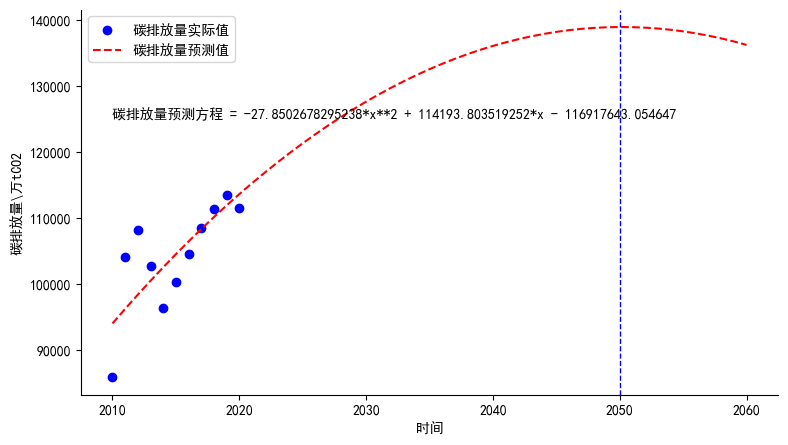

In [4]:
# 新建预测结果
system_pre_1 = pd.DataFrame(columns=system.columns)
system_pre_1['时间'] = [i for i in range(2010, 2061)]

for i in range(system_pre_1.shape[0]):
    t = system_pre_1.loc[i, ['时间']][0] # 获取第i个时间
    system_pre_1.loc[i, ['常驻人口总量']] = predict_p.subs(x, t)
    system_pre_1.loc[i, ['区域生产总值']] = predict_gdp.subs(x, t)
    system_pre_1.loc[i, ['一次能源中化石的能源消费量']] = predict_EV1.subs(x, t)
    system_pre_1.loc[i, ['一次能源中非化石的能源消费量']] = predict_EV2.subs(x, t)
    system_pre_1.loc[i, ['二次能源的能源消费量']] = predict_EV3.subs(x, t)
    system_pre_1.loc[i, ['化石能源发电的能源消费量']] = predict_EV4.subs(x, t)
    system_pre_1.loc[i, ['非化石能源发电的能源消费量']] = predict_EV5.subs(x, t)
    system_pre_1.loc[i, ['农林消费部门的碳排放量']] = predict_CO2D1.subs(x, t)
    system_pre_1.loc[i, ['工业消费部门的碳排放量']] = predict_CO2D2.subs(x, t)
    system_pre_1.loc[i, ['交通消费部门的碳排放量']] = predict_CO2D3.subs(x, t)
    system_pre_1.loc[i, ['建筑消费部门的碳排放量']] = predict_CO2D4.subs(x, t)
    system_pre_1.loc[i, ['居民生活消费部门的碳排放量']] = predict_CO2D5.subs(x, t)
    system_pre_1.loc[i, ['能源供应部门的碳排放量']] = predict_CO2D6.subs(x, t)
    system_pre_1.loc[i, ['碳排放量']] = predict_CO2.subs(x, t)

# 绘制原始曲线、两条拟合结果
import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题
fig = plt.figure(figsize=(9, 5))
(ax) = fig.subplots(1, 1)

ax.scatter(system['时间'], system['碳排放量'], c='b', label='碳排放量实际值')
ax.plot(system_pre_1['时间'], system_pre_1['碳排放量'], c='r', linestyle='--', label='碳排放量预测值')
ax.text(system_pre_1['时间'][0], 125000, "碳排放量预测方程 = {}".format(predict_CO2))
ax.axvline(t1, color='b', linestyle='--', linewidth=1)

ax.set_xlabel('时间')
ax.set_ylabel('碳排放量\万tCO2')
ax.spines['right'].set_color(None) 
ax.spines['top'].set_color(None) 
ax.legend()

### 情景2

In [5]:
data = pd.read_csv(r"E:\参加点比赛\数模研赛\data\碳排预测数据.csv")
print(data.columns)
system = data.copy()

# 假设条件下拟合得到人口、经济与时间的关系式
##############################################################################################################################################
print("假设条件下拟合得到人口、经济与时间的关系式"+"-"*100)
# 对人口做拟合
# 做多项式拟合
x = system['时间'].values.tolist()
P = system['常驻人口总量'].values.tolist()
x = x + [2030]
P = P + [6184]
def fit_p_poly(x, a, b, c):
    return a * x**2 + b * x + c
params, convariance = curve_fit(fit_p_poly, x, P)
a, b, c = params
x = sp.symbols('x')
predict_p_poly = a * x**2 + b * x + c
print("人口关于时间的多项式回归预测函数 = {}".format(predict_p_poly))
# 做线性拟合
x = system['时间'].values.tolist()
P = system['常驻人口总量'].values.tolist()
def fit_p_linear(x, a, b): 
    return a * x + b
params, convariance = curve_fit(fit_p_linear, x, P)
a, b = params
x = sp.symbols('x')
predict_p_linear = a * x + b 
print("人口关于时间的线性回归预测函数 = {}".format(predict_p_linear))
# 组合预测
predict_p = 0.8 * predict_p_linear + 0.2 * predict_p_poly
print("人口关于时间的组合预测函数 = {}".format(predict_p))

# 对经济做拟合：满足给定条件
x = system['时间'].values.tolist()
GDP = system['区域生产总值'].values.tolist()
x = x + [2035, 2060]
GDP = GDP + [2*GDP[-1], 4*GDP[-1]]
def fit_gdp(x, a, b): # 拟合函数
    return a * x + b
params, convariance = curve_fit(fit_gdp, x, GDP) # 将x、GDP放入fit_gdp中拟合
a, b = params # 获取拟合参数
x = sp.symbols('x') 
predict_gdp = a * x + b # 获取拟合方程式
print("经济关于时间的线性回归预测函数 = {}".format(predict_gdp))
print("gdp(x) = {}".format(predict_gdp))
print("p(x) = {}".format(predict_p))


# 多元线性回归 得到五种能源与人口、经济关系
##############################################################################################################################################
print("多元线性回归 得到五种能源与人口、经济关系"+"-"*100)
# 选择自变量与应变量
GDPP = system.loc[:, ['区域生产总值', '常驻人口总量']].values # 自变量
EV1 = system['一次能源中化石的能源消费量'].values
EV2 = system['一次能源中非化石的能源消费量'].values
EV3 = system['二次能源的能源消费量'].values
EV4 = system['化石能源发电的能源消费量'].values
EV5 = system['非化石能源发电的能源消费量'].values

# 求解EV1关于GDP的线性回归方程
lr_EV1 = LinearRegression()
lr_EV1.fit(GDPP, EV1)
coef_EV1 = lr_EV1.coef_
intercept_EV1 = lr_EV1.intercept_
R2_EV1 = lr_EV1.score(GDPP, EV1)
print("EV1")
print("相关系数 = ", coef_EV1)
print("截距 = ", intercept_EV1)
print("R2 = ", R2_EV1)

# 求解EV2关于GDP的线性回归方程
lr_EV2 = LinearRegression()
lr_EV2.fit(GDPP, EV2)
coef_EV2 = lr_EV2.coef_
intercept_EV2 = lr_EV2.intercept_
R2_EV2 = lr_EV2.score(GDPP, EV2)
print("EV2" )
print("相关系数 = ", coef_EV2)
print("截距 = ", intercept_EV2)
print("R2 = ", R2_EV2)

# 求解EV3关于GDP的线性回归方程
lr_EV3 = LinearRegression()
lr_EV3.fit(GDPP, EV3)
coef_EV3 = lr_EV3.coef_
intercept_EV3 = lr_EV3.intercept_
R2_EV3 = lr_EV3.score(GDPP, EV3)
print("EV3")
print("相关系数 = ", coef_EV3)
print("截距 = ", intercept_EV3)
print("R2 = ", R2_EV3)

# 求解EV4关于GDP的线性回归方程
lr_EV4 = LinearRegression()
lr_EV4.fit(GDPP, EV4)
coef_EV4 = lr_EV4.coef_
intercept_EV4 = lr_EV4.intercept_
R2_EV4 = lr_EV4.score(GDPP, EV4)
print("EV4" )
print("相关系数 = ", coef_EV4)
print("截距 = ", intercept_EV4)
print("R2 = ", R2_EV4)

# 求解EV5关于GDP的线性回归方程
lr_EV5 = LinearRegression()
lr_EV5.fit(GDPP, EV5)
coef_EV5 = lr_EV5.coef_
intercept_EV5 = lr_EV5.intercept_
R2_EV5 = lr_EV5.score(GDPP, EV5)
print("EV5")
print("相关系数 = ", coef_EV5)
print("截距 = ", intercept_EV5)
print("R2 = ", R2_EV5)

# 多元线性回归 得到六个部门碳排放量与五种能源消费量关系
##############################################################################################################################################
print("多元线性回归 得到六个部门碳排放量与五种能源消费量关系"+"-"*100)
# 选择自变量与应变量
Eall = system.loc[:, ['一次能源中化石的能源消费量', '一次能源中非化石的能源消费量', '二次能源的能源消费量', '化石能源发电的能源消费量',
       '非化石能源发电的能源消费量']]
CO2D1 = system['农林消费部门的碳排放量'].values
CO2D2 = system['工业消费部门的碳排放量'].values
CO2D3 = system['交通消费部门的碳排放量'].values
CO2D4 = system['建筑消费部门的碳排放量'].values
CO2D5 = system['居民生活消费部门的碳排放量'].values
CO2D6 = system['能源供应部门的碳排放量'].values
CO2 = system['碳排放量'].values

# 求解CO2D1关于五种能源的方程
lr_CO2D1 = LinearRegression()
lr_CO2D1.fit(Eall, CO2D1)
coef_CO2D1 = lr_CO2D1.coef_
intercept_CO2D1 = lr_CO2D1.intercept_
R2_CO2D1 = lr_CO2D1.score(Eall, CO2D1)
print("CO2D1")
print("相关系数 = ")
for i in coef_CO2D1:
    print(i)
print("截距 = ", intercept_CO2D1)
print("R2 = ", R2_CO2D1)

# 求解CO2D2关于五种能源的方程
lr_CO2D2 = LinearRegression()
lr_CO2D2.fit(Eall, CO2D2)
coef_CO2D2 = lr_CO2D2.coef_
intercept_CO2D2 = lr_CO2D2.intercept_
R2_CO2D2 = lr_CO2D2.score(Eall, CO2D2)
print("CO2D2")
print("相关系数 = ")
for i in coef_CO2D2:
    print(i)
print("截距 = ", intercept_CO2D2)
print("R2 = ", R2_CO2D2)

# 求解CO2D3关于五种能源的方程
lr_CO2D3 = LinearRegression()
lr_CO2D3.fit(Eall, CO2D3)
coef_CO2D3 = lr_CO2D3.coef_
intercept_CO2D3 = lr_CO2D3.intercept_
R2_CO2D3 = lr_CO2D3.score(Eall, CO2D3)
print("CO2D3")
print("相关系数 = ")
for i in coef_CO2D3:
    print(i)
print("截距 = ", intercept_CO2D3)
print("R2 = ", R2_CO2D3)

# 求解CO2D4关于五种能源的方程
lr_CO2D4 = LinearRegression()
lr_CO2D4.fit(Eall, CO2D4)
coef_CO2D4 = lr_CO2D4.coef_
intercept_CO2D4 = lr_CO2D4.intercept_
R2_CO2D4 = lr_CO2D4.score(Eall, CO2D4)
print("CO2D4")
print("相关系数 = ")
for i in coef_CO2D4:
    print(i)
print("截距 = ", intercept_CO2D4)
print("R2 = ", R2_CO2D4)

# 求解CO2D5关于五种能源的方程
lr_CO2D5 = LinearRegression()
lr_CO2D5.fit(Eall, CO2D5)
coef_CO2D5 = lr_CO2D5.coef_
intercept_CO2D5 = lr_CO2D5.intercept_
R2_CO2D5 = lr_CO2D5.score(Eall, CO2D5)
print("CO2D5")
print("相关系数 = ")
for i in coef_CO2D5:
    print(i)
print("截距 = ", intercept_CO2D5)
print("R2 = ", R2_CO2D5)

# 求解CO2D6关于五种能源的方程
lr_CO2D6 = LinearRegression()
lr_CO2D6.fit(Eall, CO2D6)
coef_CO2D6 = lr_CO2D6.coef_
intercept_CO2D6 = lr_CO2D6.intercept_
R2_CO2D6 = lr_CO2D6.score(Eall, CO2D6)
print("CO2D6")
print("相关系数 = ")
for i in coef_CO2D6:
    print(i)
print("截距 = ", intercept_CO2D6)
print("R2 = ", R2_CO2D6)

# 计算得到CO2的方程
##############################################################################################################################################
print("计算得到CO2的方程"+"-"*100)
predict_EV1 = coef_EV1[0] * predict_gdp + coef_EV1[1] * predict_p + intercept_EV1
predict_EV2 = coef_EV2[0] * predict_gdp + coef_EV2[1] * predict_p + intercept_EV2
predict_EV3 = coef_EV3[0] * predict_gdp + coef_EV3[1] * predict_p + intercept_EV3
predict_EV4 = coef_EV4[0] * predict_gdp + coef_EV4[1] * predict_p + intercept_EV4
predict_EV5 = coef_EV5[0] * predict_gdp + coef_EV5[1] * predict_p + intercept_EV5

predict_CO2D1 = coef_CO2D1[0] * predict_EV1 + \
                coef_CO2D1[1] * predict_EV2 + \
                coef_CO2D1[2] * predict_EV3 + \
                coef_CO2D1[3] * predict_EV4 + \
                coef_CO2D1[4] * predict_EV5 + intercept_CO2D1

predict_CO2D2 = coef_CO2D2[0] * predict_EV1 + \
                coef_CO2D2[1] * predict_EV2 + \
                coef_CO2D2[2] * predict_EV3 + \
                coef_CO2D2[3] * predict_EV4 + \
                coef_CO2D2[4] * predict_EV5 + intercept_CO2D2

predict_CO2D3 = coef_CO2D3[0] * predict_EV1 + \
                coef_CO2D3[1] * predict_EV2 + \
                coef_CO2D3[2] * predict_EV3 + \
                coef_CO2D3[3] * predict_EV4 + \
                coef_CO2D3[4] * predict_EV5 + intercept_CO2D3

predict_CO2D4 = coef_CO2D4[0] * predict_EV1 + \
                coef_CO2D4[1] * predict_EV2 + \
                coef_CO2D4[2] * predict_EV3 + \
                coef_CO2D4[3] * predict_EV4 + \
                coef_CO2D4[4] * predict_EV5 + intercept_CO2D4

predict_CO2D5 = coef_CO2D5[0] * predict_EV1 + \
                coef_CO2D5[1] * predict_EV2 + \
                coef_CO2D5[2] * predict_EV3 + \
                coef_CO2D5[3] * predict_EV4 + \
                coef_CO2D5[4] * predict_EV5 + intercept_CO2D5

predict_CO2D6 = coef_CO2D6[0] * predict_EV1 + \
                coef_CO2D6[1] * predict_EV2 + \
                coef_CO2D6[2] * predict_EV3 + \
                coef_CO2D6[3] * predict_EV4 + \
                coef_CO2D6[4] * predict_EV5 + intercept_CO2D6

predict_CO2 = predict_CO2D1 + predict_CO2D2 + predict_CO2D3 + predict_CO2D4 + predict_CO2D5 + predict_CO2D6

# 打印所有方程结果
##############################################################################################################################################
print("人口、经济关于时间" + "-"*100)
print("p(x) = ", predict_p)
print("gdp(x) = ", predict_gdp)
print("五种能源消费量关于时间" + "-"*100)
print("EV1(x) = ", predict_EV1)
print("EV2(x) = ", predict_EV2)
print("EV3(x) = ", predict_EV3)
print("EV4(x) = ", predict_EV4)
print("EV5(x) = ", predict_EV5)
print("六个部门碳排关于时间" + "-"*100)
print("CO2D1(x) = ", predict_CO2D1)
print("CO2D2(x) = ", predict_CO2D2)
print("CO2D3(x) = ", predict_CO2D3)
print("CO2D4(x) = ", predict_CO2D4)
print("CO2D5(x) = ", predict_CO2D5)
print("CO2D6(x) = ", predict_CO2D6)
print("总能耗关于时间" + "-"*100)
print("CO2(x) = ", predict_CO2)

# 求解碳达峰时间
##############################################################################################################################################
print("求解碳达峰时间"+"-"*100)
predict_CO2_d = sp.diff(predict_CO2, x)

# 求解求导=0时的t（小于0时即大于这个t即可）
t1 = sp.solve(predict_CO2_d)
t1 = int(t1[0])
print("{}年完成碳达峰".format(t1))


Index(['时间', '常驻人口总量', '区域生产总值', '一次能源中化石的能源消费量', '一次能源中非化石的能源消费量',
       '二次能源的能源消费量', '化石能源发电的能源消费量', '非化石能源发电的能源消费量', '农林消费部门的碳排放量',
       '工业消费部门的碳排放量', '交通消费部门的碳排放量', '建筑消费部门的碳排放量', '居民生活消费部门的碳排放量',
       '能源供应部门的碳排放量', '碳排放量'],
      dtype='object')
假设条件下拟合得到人口、经济与时间的关系式----------------------------------------------------------------------------------------------------
人口关于时间的多项式回归预测函数 = -13.3301422104888*x**2 + 53774.4019949321*x - 54223640.1170201
人口关于时间的线性回归预测函数 = 57.8694545455782*x - 108334.379091145
人口关于时间的组合预测函数 = -2.66602844209776*x**2 + 10801.1759626229*x - 10931395.5266769
经济关于时间的线性回归预测函数 = 6235.75029486842*x - 12499825.402055
gdp(x) = 6235.75029486842*x - 12499825.402055
p(x) = -2.66602844209776*x**2 + 10801.1759626229*x - 10931395.5266769
多元线性回归 得到五种能源与人口、经济关系----------------------------------------------------------------------------------------------------
EV1
相关系数 =  [-0.03661394 11.88157028]
截距 =  -68502.80123501654
R2 =  0.8964812600278497
EV2
相关系数 =  [-0.00017

In [6]:
# 新建预测结果
system_pre_2 = pd.DataFrame(columns=system.columns)
system_pre_2['时间'] = [i for i in range(2010, 2101)]

for i in range(system_pre_2.shape[0]):
    t = system_pre_2.loc[i, ['时间']][0] # 获取第i个时间
    system_pre_2.loc[i, ['常驻人口总量']] = predict_p.subs(x, t)
    system_pre_2.loc[i, ['区域生产总值']] = predict_gdp.subs(x, t)
    system_pre_2.loc[i, ['一次能源中化石的能源消费量']] = predict_EV1.subs(x, t)
    system_pre_2.loc[i, ['一次能源中非化石的能源消费量']] = predict_EV2.subs(x, t)
    system_pre_2.loc[i, ['二次能源的能源消费量']] = predict_EV3.subs(x, t)
    system_pre_2.loc[i, ['化石能源发电的能源消费量']] = predict_EV4.subs(x, t)
    system_pre_2.loc[i, ['非化石能源发电的能源消费量']] = predict_EV5.subs(x, t)
    system_pre_2.loc[i, ['农林消费部门的碳排放量']] = predict_CO2D1.subs(x, t)
    system_pre_2.loc[i, ['工业消费部门的碳排放量']] = predict_CO2D2.subs(x, t)
    system_pre_2.loc[i, ['交通消费部门的碳排放量']] = predict_CO2D3.subs(x, t)
    system_pre_2.loc[i, ['建筑消费部门的碳排放量']] = predict_CO2D4.subs(x, t)
    system_pre_2.loc[i, ['居民生活消费部门的碳排放量']] = predict_CO2D5.subs(x, t)
    system_pre_2.loc[i, ['能源供应部门的碳排放量']] = predict_CO2D6.subs(x, t)
    system_pre_2.loc[i, ['碳排放量']] = predict_CO2.subs(x, t)
system_pre_2['能源消费量'] = system_pre_2['一次能源中化石的能源消费量'] + system_pre_2['一次能源中非化石的能源消费量'] + system_pre_2['二次能源的能源消费量'] 


time = [i for i in range(2020, 2101)]
goal_2 = pd.DataFrame({'时间' : time})
goal_2['常驻人口总量'] = system_pre_2['常驻人口总量']
goal_2['区域生产总值'] = system_pre_2['区域生产总值']
goal_2['能源消费量'] = system_pre_2['能源消费量']
goal_2['一次能源中化石的能源消费量'] = 99
goal_2['一次能源中非化石的能源消费量'] = 99
goal_2['二次能源的能源消费量'] = 99
goal_2['化石能源发电的能源消费量'] = 99
goal_2['非化石能源发电的能源消费量'] = 99
goal_2['碳排放量'] = 99
for i in time:
    if i == 2020:
        goal_2.loc[goal_2['时间']==i, ['一次能源中化石的能源消费量']] = system.loc[system['时间']==i, ['一次能源中化石的能源消费量']].values[0]
        goal_2.loc[goal_2['时间']==i, ['一次能源中非化石的能源消费量']] = system.loc[system['时间']==i, ['一次能源中非化石的能源消费量']].values[0]
        goal_2.loc[goal_2['时间']==i, ['二次能源的能源消费量']] = system.loc[system['时间']==i, ['二次能源的能源消费量']].values[0]
        goal_2.loc[goal_2['时间']==i, ['化石能源发电的能源消费量']] = system.loc[system['时间']==i, ['化石能源发电的能源消费量']].values[0]
        goal_2.loc[goal_2['时间']==i, ['非化石能源发电的能源消费量']] = system.loc[system['时间']==i, ['非化石能源发电的能源消费量']].values[0]
        goal_2.loc[goal_2['时间']==i, ['碳排放量']] = system.loc[system['时间']==i, ['碳排放量']].values[0]
    else:
        goal_2.loc[goal_2['时间']==i, ['一次能源中化石的能源消费量']] = system_pre_2.loc[system_pre_2['时间']==i, ['一次能源中化石的能源消费量']].values[0]
        goal_2.loc[goal_2['时间']==i, ['一次能源中非化石的能源消费量']] = system_pre_2.loc[system_pre_2['时间']==i, ['一次能源中非化石的能源消费量']].values[0]
        goal_2.loc[goal_2['时间']==i, ['二次能源的能源消费量']] = system_pre_2.loc[system_pre_2['时间']==i, ['二次能源的能源消费量']].values[0]
        goal_2.loc[goal_2['时间']==i, ['化石能源发电的能源消费量']] = system_pre_2.loc[system_pre_2['时间']==i, ['化石能源发电的能源消费量']].values[0]
        goal_2.loc[goal_2['时间']==i, ['非化石能源发电的能源消费量']] = system_pre_2.loc[system_pre_2['时间']==i, ['非化石能源发电的能源消费量']].values[0]
        goal_2.loc[goal_2['时间']==i, ['碳排放量']] = system_pre_2.loc[system_pre_2['时间']==i, ['碳排放量']].values[0]
goal_2['能源利用效率'] = goal_2['碳排放量'] / \
                        (goal_2['一次能源中化石的能源消费量'] + \
                        goal_2['一次能源中非化石的能源消费量'] + \
                        goal_2['二次能源的能源消费量'])
goal_2['非化石能源消费比重'] = (goal_2['一次能源中非化石的能源消费量'] + goal_2['二次能源的能源消费量']) / \
                            (goal_2['一次能源中化石的能源消费量'] + goal_2['一次能源中非化石的能源消费量'] + goal_2['二次能源的能源消费量'] )
goal_2.drop(columns=['一次能源中化石的能源消费量', '一次能源中非化石的能源消费量',
       '二次能源的能源消费量', '化石能源发电的能源消费量', '非化石能源发电的能源消费量',], inplace=True)
goal_2.to_csv(r"E:\参加点比赛\数模研赛\results\T3\情景2目标值汇总截至2100年.csv", encoding='utf-8-sig', index=False)
goal_2.head(2)

,时间,常驻人口总量,区域生产总值,能源消费量,碳排放量,能源利用效率,非化石能源消费比重
0,2020,7946.64927589521,34032.6906305365,24954.8484960543,111492.9407,3.546439,0.087092
1,2021,8027.72487284429,40268.4409254063,25932.0895280577,114276.775816679,3.49201011240882,0.105574572653802


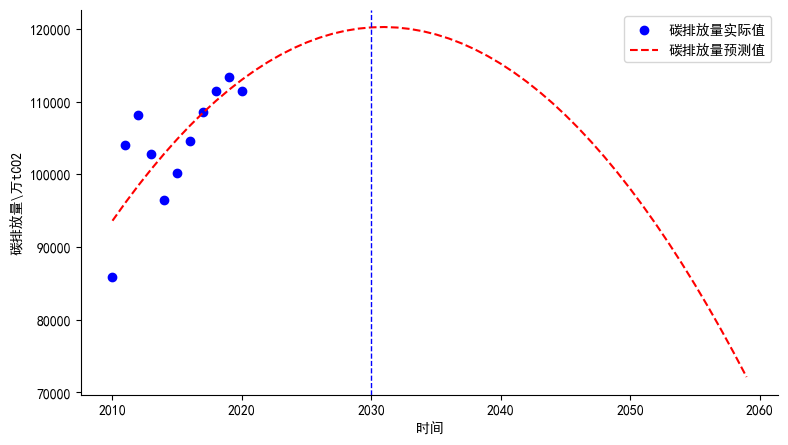

In [7]:
# 新建预测结果
system_pre_2 = pd.DataFrame(columns=system.columns)
system_pre_2['时间'] = [i for i in range(2010, 2060)]

for i in range(system_pre_2.shape[0]):
    t = system_pre_2.loc[i, ['时间']][0] # 获取第i个时间
    system_pre_2.loc[i, ['常驻人口总量']] = predict_p.subs(x, t)
    system_pre_2.loc[i, ['区域生产总值']] = predict_gdp.subs(x, t)
    system_pre_2.loc[i, ['一次能源中化石的能源消费量']] = predict_EV1.subs(x, t)
    system_pre_2.loc[i, ['一次能源中非化石的能源消费量']] = predict_EV2.subs(x, t)
    system_pre_2.loc[i, ['二次能源的能源消费量']] = predict_EV3.subs(x, t)
    system_pre_2.loc[i, ['化石能源发电的能源消费量']] = predict_EV4.subs(x, t)
    system_pre_2.loc[i, ['非化石能源发电的能源消费量']] = predict_EV5.subs(x, t)
    system_pre_2.loc[i, ['农林消费部门的碳排放量']] = predict_CO2D1.subs(x, t)
    system_pre_2.loc[i, ['工业消费部门的碳排放量']] = predict_CO2D2.subs(x, t)
    system_pre_2.loc[i, ['交通消费部门的碳排放量']] = predict_CO2D3.subs(x, t)
    system_pre_2.loc[i, ['建筑消费部门的碳排放量']] = predict_CO2D4.subs(x, t)
    system_pre_2.loc[i, ['居民生活消费部门的碳排放量']] = predict_CO2D5.subs(x, t)
    system_pre_2.loc[i, ['能源供应部门的碳排放量']] = predict_CO2D6.subs(x, t)
    system_pre_2.loc[i, ['碳排放量']] = predict_CO2.subs(x, t)

# 绘制原始曲线、两条拟合结果
import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题
fig = plt.figure(figsize=(9, 5))
(ax) = fig.subplots(1, 1)

ax.scatter(system['时间'], system['碳排放量'], c='b', label='碳排放量实际值')
ax.plot(system_pre_2['时间'], system_pre_2['碳排放量'], c='r', linestyle='--', label='碳排放量预测值')
ax.axvline(t1, color='b', linestyle='--', linewidth=1)

ax.set_xlabel('时间')
ax.set_ylabel('碳排放量\万tCO2')
ax.spines['right'].set_color(None) 
ax.spines['top'].set_color(None) 
ax.legend()

### 情景3

In [8]:
data = pd.read_csv(r"E:\参加点比赛\数模研赛\data\碳排预测数据.csv")
print(data.columns)
system = data.copy()

# 假设条件下拟合得到人口、经济与时间的关系式
##############################################################################################################################################
print("假设条件下拟合得到人口、经济与时间的关系式"+"-"*100)
# 对人口做拟合
# 做多项式拟合
x = system['时间'].values.tolist()
P = system['常驻人口总量'].values.tolist()
x = x + [2030]
P = P + [4864]
def fit_p_poly(x, a, b, c):
    return a * x**2 + b * x + c
params, convariance = curve_fit(fit_p_poly, x, P)
a, b, c = params
x = sp.symbols('x')
predict_p_poly = a * x**2 + b * x + c
print("人口关于时间的多项式回归预测函数 = {}".format(predict_p_poly))
# 做线性拟合
x = system['时间'].values.tolist()
P = system['常驻人口总量'].values.tolist()
def fit_p_linear(x, a, b): 
    return a * x + b
params, convariance = curve_fit(fit_p_linear, x, P)
a, b = params
x = sp.symbols('x')
predict_p_linear = a * x + b 
print("人口关于时间的线性回归预测函数 = {}".format(predict_p_linear))
# 组合预测
predict_p = 0.8 * predict_p_linear + 0.2 * predict_p_poly
print("人口关于时间的组合预测函数 = {}".format(predict_p))

# 对经济做拟合：满足给定条件
x = system['时间'].values.tolist()
GDP = system['区域生产总值'].values.tolist()
x = x + [2035, 2060]
GDP = GDP + [2*GDP[-1], 4*GDP[-1]]
def fit_gdp(x, a, b): # 拟合函数
    return a * x + b
params, convariance = curve_fit(fit_gdp, x, GDP) # 将x、GDP放入fit_gdp中拟合
a, b = params # 获取拟合参数
x = sp.symbols('x') 
predict_gdp = a * x + b # 获取拟合方程式
print("经济关于时间的线性回归预测函数 = {}".format(predict_gdp))
print("gdp(x) = {}".format(predict_gdp))
print("p(x) = {}".format(predict_p))


# 多元线性回归 得到五种能源与人口、经济关系
##############################################################################################################################################
print("多元线性回归 得到五种能源与人口、经济关系"+"-"*100)
# 选择自变量与应变量
GDPP = system.loc[:, ['区域生产总值', '常驻人口总量']].values # 自变量
EV1 = system['一次能源中化石的能源消费量'].values
EV2 = system['一次能源中非化石的能源消费量'].values
EV3 = system['二次能源的能源消费量'].values
EV4 = system['化石能源发电的能源消费量'].values
EV5 = system['非化石能源发电的能源消费量'].values

# 求解EV1关于GDP的线性回归方程
lr_EV1 = LinearRegression()
lr_EV1.fit(GDPP, EV1)
coef_EV1 = lr_EV1.coef_
intercept_EV1 = lr_EV1.intercept_
R2_EV1 = lr_EV1.score(GDPP, EV1)
print("EV1")
print("相关系数 = ", coef_EV1)
print("截距 = ", intercept_EV1)
print("R2 = ", R2_EV1)

# 求解EV2关于GDP的线性回归方程
lr_EV2 = LinearRegression()
lr_EV2.fit(GDPP, EV2)
coef_EV2 = lr_EV2.coef_
intercept_EV2 = lr_EV2.intercept_
R2_EV2 = lr_EV2.score(GDPP, EV2)
print("EV2" )
print("相关系数 = ", coef_EV2)
print("截距 = ", intercept_EV2)
print("R2 = ", R2_EV2)

# 求解EV3关于GDP的线性回归方程
lr_EV3 = LinearRegression()
lr_EV3.fit(GDPP, EV3)
coef_EV3 = lr_EV3.coef_
intercept_EV3 = lr_EV3.intercept_
R2_EV3 = lr_EV3.score(GDPP, EV3)
print("EV3")
print("相关系数 = ", coef_EV3)
print("截距 = ", intercept_EV3)
print("R2 = ", R2_EV3)

# 求解EV4关于GDP的线性回归方程
lr_EV4 = LinearRegression()
lr_EV4.fit(GDPP, EV4)
coef_EV4 = lr_EV4.coef_
intercept_EV4 = lr_EV4.intercept_
R2_EV4 = lr_EV4.score(GDPP, EV4)
print("EV4" )
print("相关系数 = ", coef_EV4)
print("截距 = ", intercept_EV4)
print("R2 = ", R2_EV4)

# 求解EV5关于GDP的线性回归方程
lr_EV5 = LinearRegression()
lr_EV5.fit(GDPP, EV5)
coef_EV5 = lr_EV5.coef_
intercept_EV5 = lr_EV5.intercept_
R2_EV5 = lr_EV5.score(GDPP, EV5)
print("EV5")
print("相关系数 = ", coef_EV5)
print("截距 = ", intercept_EV5)
print("R2 = ", R2_EV5)

# 多元线性回归 得到六个部门碳排放量与五种能源消费量关系
##############################################################################################################################################
print("多元线性回归 得到六个部门碳排放量与五种能源消费量关系"+"-"*100)
# 选择自变量与应变量
Eall = system.loc[:, ['一次能源中化石的能源消费量', '一次能源中非化石的能源消费量', '二次能源的能源消费量', '化石能源发电的能源消费量',
       '非化石能源发电的能源消费量']]
CO2D1 = system['农林消费部门的碳排放量'].values
CO2D2 = system['工业消费部门的碳排放量'].values
CO2D3 = system['交通消费部门的碳排放量'].values
CO2D4 = system['建筑消费部门的碳排放量'].values
CO2D5 = system['居民生活消费部门的碳排放量'].values
CO2D6 = system['能源供应部门的碳排放量'].values
CO2 = system['碳排放量'].values

# 求解CO2D1关于五种能源的方程
lr_CO2D1 = LinearRegression()
lr_CO2D1.fit(Eall, CO2D1)
coef_CO2D1 = lr_CO2D1.coef_
intercept_CO2D1 = lr_CO2D1.intercept_
R2_CO2D1 = lr_CO2D1.score(Eall, CO2D1)
print("CO2D1")
print("相关系数 = ")
for i in coef_CO2D1:
    print(i)
print("截距 = ", intercept_CO2D1)
print("R2 = ", R2_CO2D1)

# 求解CO2D2关于五种能源的方程
lr_CO2D2 = LinearRegression()
lr_CO2D2.fit(Eall, CO2D2)
coef_CO2D2 = lr_CO2D2.coef_
intercept_CO2D2 = lr_CO2D2.intercept_
R2_CO2D2 = lr_CO2D2.score(Eall, CO2D2)
print("CO2D2")
print("相关系数 = ")
for i in coef_CO2D2:
    print(i)
print("截距 = ", intercept_CO2D2)
print("R2 = ", R2_CO2D2)

# 求解CO2D3关于五种能源的方程
lr_CO2D3 = LinearRegression()
lr_CO2D3.fit(Eall, CO2D3)
coef_CO2D3 = lr_CO2D3.coef_
intercept_CO2D3 = lr_CO2D3.intercept_
R2_CO2D3 = lr_CO2D3.score(Eall, CO2D3)
print("CO2D3")
print("相关系数 = ")
for i in coef_CO2D3:
    print(i)
print("截距 = ", intercept_CO2D3)
print("R2 = ", R2_CO2D3)

# 求解CO2D4关于五种能源的方程
lr_CO2D4 = LinearRegression()
lr_CO2D4.fit(Eall, CO2D4)
coef_CO2D4 = lr_CO2D4.coef_
intercept_CO2D4 = lr_CO2D4.intercept_
R2_CO2D4 = lr_CO2D4.score(Eall, CO2D4)
print("CO2D4")
print("相关系数 = ")
for i in coef_CO2D4:
    print(i)
print("截距 = ", intercept_CO2D4)
print("R2 = ", R2_CO2D4)

# 求解CO2D5关于五种能源的方程
lr_CO2D5 = LinearRegression()
lr_CO2D5.fit(Eall, CO2D5)
coef_CO2D5 = lr_CO2D5.coef_
intercept_CO2D5 = lr_CO2D5.intercept_
R2_CO2D5 = lr_CO2D5.score(Eall, CO2D5)
print("CO2D5")
print("相关系数 = ")
for i in coef_CO2D5:
    print(i)
print("截距 = ", intercept_CO2D5)
print("R2 = ", R2_CO2D5)

# 求解CO2D6关于五种能源的方程
lr_CO2D6 = LinearRegression()
lr_CO2D6.fit(Eall, CO2D6)
coef_CO2D6 = lr_CO2D6.coef_
intercept_CO2D6 = lr_CO2D6.intercept_
R2_CO2D6 = lr_CO2D6.score(Eall, CO2D6)
print("CO2D6")
print("相关系数 = ")
for i in coef_CO2D6:
    print(i)
print("截距 = ", intercept_CO2D6)
print("R2 = ", R2_CO2D6)

# 计算得到CO2的方程
##############################################################################################################################################
print("计算得到CO2的方程"+"-"*100)
predict_EV1 = coef_EV1[0] * predict_gdp + coef_EV1[1] * predict_p + intercept_EV1
predict_EV2 = coef_EV2[0] * predict_gdp + coef_EV2[1] * predict_p + intercept_EV2
predict_EV3 = coef_EV3[0] * predict_gdp + coef_EV3[1] * predict_p + intercept_EV3
predict_EV4 = coef_EV4[0] * predict_gdp + coef_EV4[1] * predict_p + intercept_EV4
predict_EV5 = coef_EV5[0] * predict_gdp + coef_EV5[1] * predict_p + intercept_EV5

predict_CO2D1 = coef_CO2D1[0] * predict_EV1 + \
                coef_CO2D1[1] * predict_EV2 + \
                coef_CO2D1[2] * predict_EV3 + \
                coef_CO2D1[3] * predict_EV4 + \
                coef_CO2D1[4] * predict_EV5 + intercept_CO2D1

predict_CO2D2 = coef_CO2D2[0] * predict_EV1 + \
                coef_CO2D2[1] * predict_EV2 + \
                coef_CO2D2[2] * predict_EV3 + \
                coef_CO2D2[3] * predict_EV4 + \
                coef_CO2D2[4] * predict_EV5 + intercept_CO2D2

predict_CO2D3 = coef_CO2D3[0] * predict_EV1 + \
                coef_CO2D3[1] * predict_EV2 + \
                coef_CO2D3[2] * predict_EV3 + \
                coef_CO2D3[3] * predict_EV4 + \
                coef_CO2D3[4] * predict_EV5 + intercept_CO2D3

predict_CO2D4 = coef_CO2D4[0] * predict_EV1 + \
                coef_CO2D4[1] * predict_EV2 + \
                coef_CO2D4[2] * predict_EV3 + \
                coef_CO2D4[3] * predict_EV4 + \
                coef_CO2D4[4] * predict_EV5 + intercept_CO2D4

predict_CO2D5 = coef_CO2D5[0] * predict_EV1 + \
                coef_CO2D5[1] * predict_EV2 + \
                coef_CO2D5[2] * predict_EV3 + \
                coef_CO2D5[3] * predict_EV4 + \
                coef_CO2D5[4] * predict_EV5 + intercept_CO2D5

predict_CO2D6 = coef_CO2D6[0] * predict_EV1 + \
                coef_CO2D6[1] * predict_EV2 + \
                coef_CO2D6[2] * predict_EV3 + \
                coef_CO2D6[3] * predict_EV4 + \
                coef_CO2D6[4] * predict_EV5 + intercept_CO2D6

predict_CO2 = predict_CO2D1 + predict_CO2D2 + predict_CO2D3 + predict_CO2D4 + predict_CO2D5 + predict_CO2D6

# 打印所有方程结果
##############################################################################################################################################
print("人口、经济关于时间" + "-"*100)
print("p(x) = ", predict_p)
print("gdp(x) = ", predict_gdp)
print("五种能源消费量关于时间" + "-"*100)
print("EV1(x) = ", predict_EV1)
print("EV2(x) = ", predict_EV2)
print("EV3(x) = ", predict_EV3)
print("EV4(x) = ", predict_EV4)
print("EV5(x) = ", predict_EV5)
print("六个部门碳排关于时间" + "-"*100)
print("CO2D1(x) = ", predict_CO2D1)
print("CO2D2(x) = ", predict_CO2D2)
print("CO2D3(x) = ", predict_CO2D3)
print("CO2D4(x) = ", predict_CO2D4)
print("CO2D5(x) = ", predict_CO2D5)
print("CO2D6(x) = ", predict_CO2D6)
print("总能耗关于时间" + "-"*100)
print("CO2(x) = ", predict_CO2)

# 求解碳达峰时间
##############################################################################################################################################
print("求解碳达峰时间"+"-"*100)
predict_CO2_d = sp.diff(predict_CO2, x)

# 求解求导=0时的t（小于0时即大于这个t即可）
t1 = sp.solve(predict_CO2_d)
t1 = int(t1[0])
print("{}年完成碳达峰".format(t1))


Index(['时间', '常驻人口总量', '区域生产总值', '一次能源中化石的能源消费量', '一次能源中非化石的能源消费量',
       '二次能源的能源消费量', '化石能源发电的能源消费量', '非化石能源发电的能源消费量', '农林消费部门的碳排放量',
       '工业消费部门的碳排放量', '交通消费部门的碳排放量', '建筑消费部门的碳排放量', '居民生活消费部门的碳排放量',
       '能源供应部门的碳排放量', '碳排放量'],
      dtype='object')
假设条件下拟合得到人口、经济与时间的关系式----------------------------------------------------------------------------------------------------
人口关于时间的多项式回归预测函数 = -19.1319248583423*x**2 + 77152.4288166201*x - 77773765.298347
人口关于时间的线性回归预测函数 = 57.8694545455782*x - 108334.379091145
人口关于时间的组合预测函数 = -3.82638497166845*x**2 + 15476.7813269605*x - 15641420.5629423
经济关于时间的线性回归预测函数 = 6235.75029486842*x - 12499825.402055
gdp(x) = 6235.75029486842*x - 12499825.402055
p(x) = -3.82638497166845*x**2 + 15476.7813269605*x - 15641420.5629423
多元线性回归 得到五种能源与人口、经济关系----------------------------------------------------------------------------------------------------
EV1
相关系数 =  [-0.03661394 11.88157028]
截距 =  -68502.80123501654
R2 =  0.8964812600278497
EV2
相关系数 =  [-0.000171

In [9]:
# 新建预测结果
system_pre_3 = pd.DataFrame(columns=system.columns)
system_pre_3['时间'] = [i for i in range(2010, 2101)]

for i in range(system_pre_3.shape[0]):
    t = system_pre_3.loc[i, ['时间']][0] # 获取第i个时间
    system_pre_3.loc[i, ['常驻人口总量']] = predict_p.subs(x, t)
    system_pre_3.loc[i, ['区域生产总值']] = predict_gdp.subs(x, t)
    system_pre_3.loc[i, ['一次能源中化石的能源消费量']] = predict_EV1.subs(x, t)
    system_pre_3.loc[i, ['一次能源中非化石的能源消费量']] = predict_EV2.subs(x, t)
    system_pre_3.loc[i, ['二次能源的能源消费量']] = predict_EV3.subs(x, t)
    system_pre_3.loc[i, ['化石能源发电的能源消费量']] = predict_EV4.subs(x, t)
    system_pre_3.loc[i, ['非化石能源发电的能源消费量']] = predict_EV5.subs(x, t)
    system_pre_3.loc[i, ['农林消费部门的碳排放量']] = predict_CO2D1.subs(x, t)
    system_pre_3.loc[i, ['工业消费部门的碳排放量']] = predict_CO2D2.subs(x, t)
    system_pre_3.loc[i, ['交通消费部门的碳排放量']] = predict_CO2D3.subs(x, t)
    system_pre_3.loc[i, ['建筑消费部门的碳排放量']] = predict_CO2D4.subs(x, t)
    system_pre_3.loc[i, ['居民生活消费部门的碳排放量']] = predict_CO2D5.subs(x, t)
    system_pre_3.loc[i, ['能源供应部门的碳排放量']] = predict_CO2D6.subs(x, t)
    system_pre_3.loc[i, ['碳排放量']] = predict_CO2.subs(x, t)
system_pre_3['能源消费量'] = system_pre_3['一次能源中化石的能源消费量'] + system_pre_3['一次能源中非化石的能源消费量'] + system_pre_3['二次能源的能源消费量'] 


time = [i for i in range(2020, 2101)]
goal_3 = pd.DataFrame({'时间' : time})
goal_3['常驻人口总量'] = system_pre_3['常驻人口总量']
goal_3['区域生产总值'] = system_pre_3['区域生产总值']
goal_3['能源消费量'] = system_pre_3['能源消费量']
goal_3['一次能源中化石的能源消费量'] = 99
goal_3['一次能源中非化石的能源消费量'] = 99
goal_3['二次能源的能源消费量'] = 99
goal_3['化石能源发电的能源消费量'] = 99
goal_3['非化石能源发电的能源消费量'] = 99
goal_3['碳排放量'] = 99
for i in time:
    if i == 2020:
        goal_3.loc[goal_3['时间']==i, ['一次能源中化石的能源消费量']] = system.loc[system['时间']==i, ['一次能源中化石的能源消费量']].values[0]
        goal_3.loc[goal_3['时间']==i, ['一次能源中非化石的能源消费量']] = system.loc[system['时间']==i, ['一次能源中非化石的能源消费量']].values[0]
        goal_3.loc[goal_3['时间']==i, ['二次能源的能源消费量']] = system.loc[system['时间']==i, ['二次能源的能源消费量']].values[0]
        goal_3.loc[goal_3['时间']==i, ['化石能源发电的能源消费量']] = system.loc[system['时间']==i, ['化石能源发电的能源消费量']].values[0]
        goal_3.loc[goal_3['时间']==i, ['非化石能源发电的能源消费量']] = system.loc[system['时间']==i, ['非化石能源发电的能源消费量']].values[0]
        goal_3.loc[goal_3['时间']==i, ['碳排放量']] = system.loc[system['时间']==i, ['碳排放量']].values[0]
    else:
        goal_3.loc[goal_3['时间']==i, ['一次能源中化石的能源消费量']] = system_pre_3.loc[system_pre_3['时间']==i, ['一次能源中化石的能源消费量']].values[0]
        goal_3.loc[goal_3['时间']==i, ['一次能源中非化石的能源消费量']] = system_pre_3.loc[system_pre_3['时间']==i, ['一次能源中非化石的能源消费量']].values[0]
        goal_3.loc[goal_3['时间']==i, ['二次能源的能源消费量']] = system_pre_3.loc[system_pre_3['时间']==i, ['二次能源的能源消费量']].values[0]
        goal_3.loc[goal_3['时间']==i, ['化石能源发电的能源消费量']] = system_pre_3.loc[system_pre_3['时间']==i, ['化石能源发电的能源消费量']].values[0]
        goal_3.loc[goal_3['时间']==i, ['非化石能源发电的能源消费量']] = system_pre_3.loc[system_pre_3['时间']==i, ['非化石能源发电的能源消费量']].values[0]
        goal_3.loc[goal_3['时间']==i, ['碳排放量']] = system_pre_3.loc[system_pre_3['时间']==i, ['碳排放量']].values[0]
goal_3['能源利用效率'] = goal_3['碳排放量'] / \
                        (goal_3['一次能源中化石的能源消费量'] + \
                        goal_3['一次能源中非化石的能源消费量'] + \
                        goal_3['二次能源的能源消费量'])
goal_3['非化石能源消费比重'] = (goal_3['一次能源中非化石的能源消费量'] + goal_3['二次能源的能源消费量']) / \
                            (goal_3['一次能源中化石的能源消费量'] + goal_3['一次能源中非化石的能源消费量'] + goal_3['二次能源的能源消费量'] )
goal_3.drop(columns=['一次能源中化石的能源消费量', '一次能源中非化石的能源消费量',
       '二次能源的能源消费量', '化石能源发电的能源消费量', '非化石能源发电的能源消费量',], inplace=True)
goal_3.to_csv(r"E:\参加点比赛\数模研赛\results\T3\情景3目标值汇总截至2100年.csv", encoding='utf-8-sig', index=False)
goal_3.head(2)

,时间,常驻人口总量,区域生产总值,能源消费量,碳排放量,能源利用效率,非化石能源消费比重
0,2020,7931.98021055944,34032.6906305365,24805.8241400775,111492.9407,3.546439,0.087092
1,2021,8022.86756644212,40268.4409254063,25882.7437148103,113490.543332577,3.50539604755840,0.108542512132144


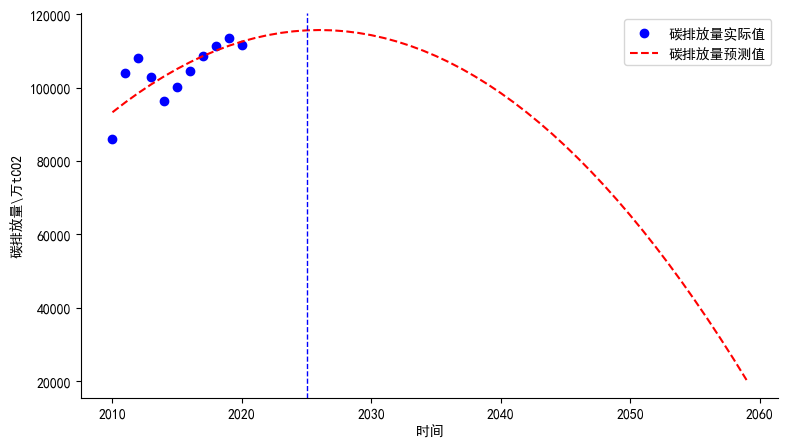

In [10]:
# 新建预测结果
system_pre_3 = pd.DataFrame(columns=system.columns)
system_pre_3['时间'] = [i for i in range(2010, 2060)]

for i in range(system_pre_3.shape[0]):
    t = system_pre_3.loc[i, ['时间']][0] # 获取第i个时间
    system_pre_3.loc[i, ['常驻人口总量']] = predict_p.subs(x, t)
    system_pre_3.loc[i, ['区域生产总值']] = predict_gdp.subs(x, t)
    system_pre_3.loc[i, ['一次能源中化石的能源消费量']] = predict_EV1.subs(x, t)
    system_pre_3.loc[i, ['一次能源中非化石的能源消费量']] = predict_EV2.subs(x, t)
    system_pre_3.loc[i, ['二次能源的能源消费量']] = predict_EV3.subs(x, t)
    system_pre_3.loc[i, ['化石能源发电的能源消费量']] = predict_EV4.subs(x, t)
    system_pre_3.loc[i, ['非化石能源发电的能源消费量']] = predict_EV5.subs(x, t)
    system_pre_3.loc[i, ['农林消费部门的碳排放量']] = predict_CO2D1.subs(x, t)
    system_pre_3.loc[i, ['工业消费部门的碳排放量']] = predict_CO2D2.subs(x, t)
    system_pre_3.loc[i, ['交通消费部门的碳排放量']] = predict_CO2D3.subs(x, t)
    system_pre_3.loc[i, ['建筑消费部门的碳排放量']] = predict_CO2D4.subs(x, t)
    system_pre_3.loc[i, ['居民生活消费部门的碳排放量']] = predict_CO2D5.subs(x, t)
    system_pre_3.loc[i, ['能源供应部门的碳排放量']] = predict_CO2D6.subs(x, t)
    system_pre_3.loc[i, ['碳排放量']] = predict_CO2.subs(x, t)

# 绘制原始曲线、两条拟合结果
import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题
fig = plt.figure(figsize=(9, 5))
(ax) = fig.subplots(1, 1)

ax.scatter(system['时间'], system['碳排放量'], c='b', label='碳排放量实际值')
ax.plot(system_pre_3['时间'], system_pre_3['碳排放量'], c='r', linestyle='--', label='碳排放量预测值')
ax.axvline(t1, color='b', linestyle='--', linewidth=1)

ax.set_xlabel('时间')
ax.set_ylabel('碳排放量\万tCO2')
ax.spines['right'].set_color(None) 
ax.spines['top'].set_color(None) 
ax.legend()

### 绘制三种情景结果图

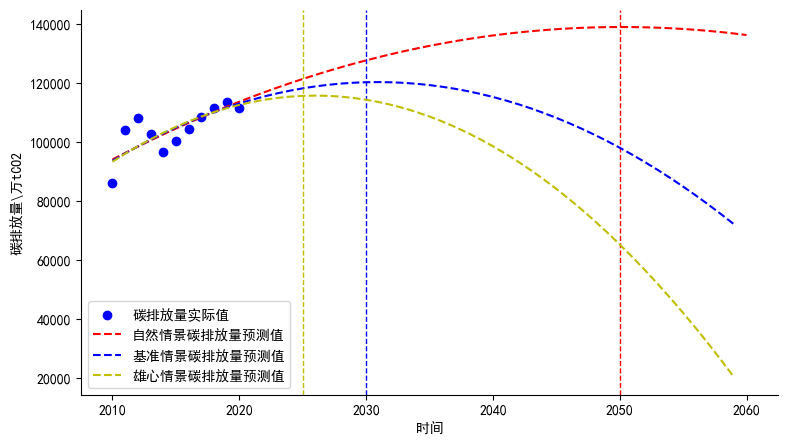

In [11]:
# 绘制原始曲线、两条拟合结果
import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题
fig = plt.figure(figsize=(9, 5))
(ax) = fig.subplots(1, 1)

ax.scatter(system['时间'], system['碳排放量'], c='b', label='碳排放量实际值')

ax.plot(system_pre_1['时间'], system_pre_1['碳排放量'], c='r', linestyle='--', label='自然情景碳排放量预测值')
ax.axvline(2050, color='r', linestyle='--', linewidth=1)

ax.plot(system_pre_2['时间'], system_pre_2['碳排放量'], c='b', linestyle='--', label='基准情景碳排放量预测值')
ax.axvline(2030, color='b', linestyle='--', linewidth=1)

ax.plot(system_pre_3['时间'], system_pre_3['碳排放量'], c='y', linestyle='--', label='雄心情景碳排放量预测值')
ax.axvline(2025, color='y', linestyle='--', linewidth=1)
ax.set_xlabel('时间')
ax.set_ylabel('碳排放量\万tCO2')
ax.spines['right'].set_color(None) 
ax.spines['top'].set_color(None) 
ax.legend()

plt.savefig(r"E:\参加点比赛\数模研赛\results\T3\三种情景碳排放量预测值.jpg", dpi=500)

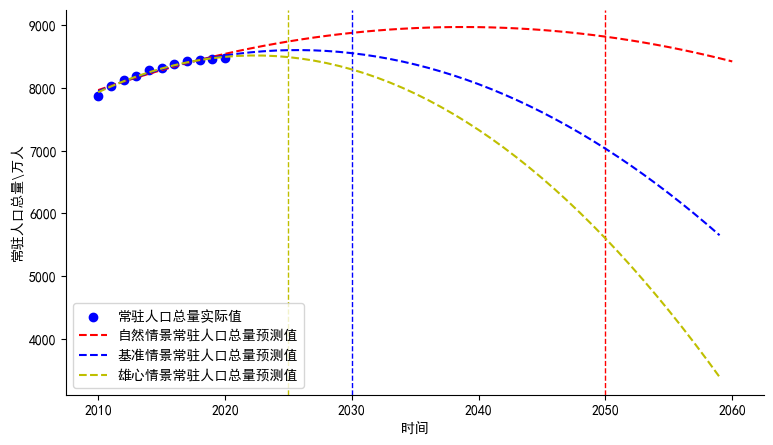

In [12]:
# 绘制原始曲线、两条拟合结果
import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题
fig = plt.figure(figsize=(9, 5))
(ax) = fig.subplots(1, 1)

ax.scatter(system['时间'], system['常驻人口总量'], c='b', label='常驻人口总量实际值')

ax.plot(system_pre_1['时间'], system_pre_1['常驻人口总量'], c='r', linestyle='--', label='自然情景常驻人口总量预测值')
ax.axvline(2050, color='r', linestyle='--', linewidth=1)

ax.plot(system_pre_2['时间'], system_pre_2['常驻人口总量'], c='b', linestyle='--', label='基准情景常驻人口总量预测值')
ax.axvline(2030, color='b', linestyle='--', linewidth=1)

ax.plot(system_pre_3['时间'], system_pre_3['常驻人口总量'], c='y', linestyle='--', label='雄心情景常驻人口总量预测值')
ax.axvline(2025, color='y', linestyle='--', linewidth=1)

ax.spines['right'].set_color(None) 
ax.spines['top'].set_color(None) 
ax.set_xlabel('时间')
ax.set_ylabel('常驻人口总量\万人')
ax.legend()

plt.savefig(r"E:\参加点比赛\数模研赛\results\T3\三种情景常驻人口总量预测值.jpg", dpi=500)

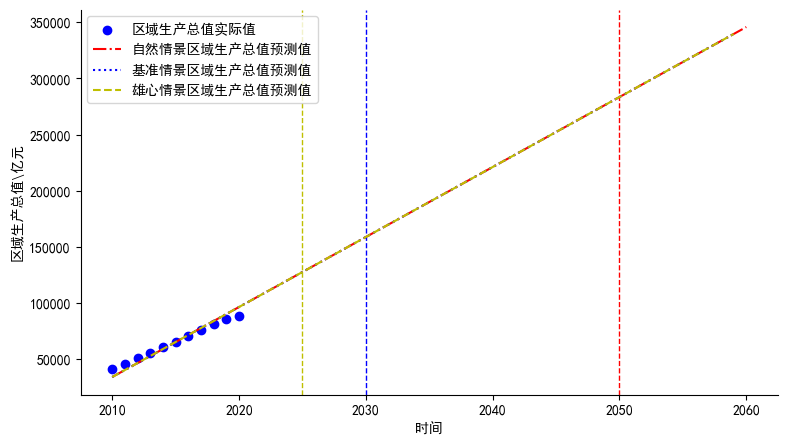

In [13]:
# 绘制原始曲线、两条拟合结果
import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题
fig = plt.figure(figsize=(9, 5))
(ax) = fig.subplots(1, 1)

ax.scatter(system['时间'], system['区域生产总值'], c='b', label='区域生产总值实际值')

ax.plot(system_pre_1['时间'], system_pre_1['区域生产总值'], c='r', linestyle='-.', label='自然情景区域生产总值预测值')
ax.axvline(2050, color='r', linestyle='--', linewidth=1)

ax.plot(system_pre_2['时间'], system_pre_2['区域生产总值'], c='b', linestyle=':', label='基准情景区域生产总值预测值')
ax.axvline(2030, color='b', linestyle='--', linewidth=1)

ax.plot(system_pre_3['时间'], system_pre_3['区域生产总值'], c='y', linestyle='--', label='雄心情景区域生产总值预测值')
ax.axvline(2025, color='y', linestyle='--', linewidth=1)

ax.spines['right'].set_color(None) 
ax.spines['top'].set_color(None) 
ax.set_xlabel('时间')
ax.set_ylabel('区域生产总值\亿元')
ax.legend()

plt.savefig(r"E:\参加点比赛\数模研赛\results\T3\三种情景区域生产总值预测值.jpg", dpi=500)

In [19]:
goal_1.columns

Index(['时间', '常驻人口总量', '区域生产总值', '能源消费量', '碳排放量', '能源利用效率', '非化石能源消费比重'], dtype='object')

### 计算经济、人口、能耗目标值：2025、2030、2035、2050、2060

In [14]:
time = [2025, 2030, 2035, 2050, 2060]
columns = ['区域生产总值', '常驻人口总量', '能源消费量']

scene1_1 = goal_1.copy()
scene1_1 = scene1_1.set_index(['时间'])
scene1_1 = scene1_1.loc[time, columns]

scene2_1 = goal_2.copy()
scene2_1 = scene2_1.set_index(['时间'])
scene2_1 = scene2_1.loc[time, columns]

scene3_1 = goal_3.copy()
scene3_1 = scene3_1.set_index(['时间'])
scene3_1 = scene3_1.loc[time, columns]

scene1_1 = scene1_1.reset_index(drop=False)
scene2_1 = scene2_1.reset_index(drop=False)
scene3_1 = scene3_1.reset_index(drop=False)

scene1_1.to_csv(r"E:\参加点比赛\数模研赛\results\T3\自然情景目标值_要求1.csv", encoding='utf-8-sig', index=False)
scene2_1.to_csv(r"E:\参加点比赛\数模研赛\results\T3\基准情景目标值_要求1.csv", encoding='utf-8-sig', index=False)
scene3_1.to_csv(r"E:\参加点比赛\数模研赛\results\T3\雄心情景目标值_要求1.csv", encoding='utf-8-sig', index=False)

In [15]:
scene1_1

,时间,区域生产总值,常驻人口总量,能源消费量
0,2025,65211.4421048798,8284.74967190344,29157.5745729161
1,2030,96390.1935792211,8543.65230592620,32555.7234529690
2,2035,127568.945053564,8741.66566255409,35335.2926800619
3,2050,221105.199476590,8970.37006807048,39962.5224436743
4,2060,283462.702425275,8818.39328477439,39954.4440213128


In [16]:
scene2_1

,时间,区域生产总值,常驻人口总量,能源消费量
0,2025,65211.4421048798,8298.70669179410,29299.3651950033
1,2030,96390.1935792211,8517.46268558502,32289.6607411979
2,2035,127568.945053564,8602.91725727357,33925.7351346770
3,2050,221105.199476590,8059.47243970633,30708.6313985577
4,2060,283462.702425275,7030.66878413595,21792.7898107059


In [17]:
scene3_1

,时间,区域生产总值,常驻人口总量,能源消费量
0,2025,65211.4421048798,8309.88929053582,29412.9702226948
1,2030,96390.1935792211,8496.47912192531,32076.4868280683
2,2035,127568.945053564,8491.74970473535,32796.3739562305
3,2050,221105.199476590,7329.64596165903,23294.2584773107
4,2060,283462.702425275,5598.31389002316,7241.36743854173


### 计算能源利用效率、提高非化石能源消费比重的目标值

In [20]:
time = [2025, 2030, 2035, 2050, 2060]
columns = ['能源利用效率', '非化石能源消费比重']

scene1_2 = goal_1.copy()
scene1_2 = scene1_2.set_index(['时间'])
scene1_2 = scene1_2.loc[time, columns]

scene2_2 = goal_2.copy()
scene2_2 = scene2_2.set_index(['时间'])
scene2_2 = scene2_2.loc[time, columns]

scene3_2 = goal_3.copy()
scene3_2 = scene3_2.set_index(['时间'])
scene3_2 = scene3_2.loc[time, columns]

scene1_2 = scene1_2.reset_index(drop=False)
scene2_2 = scene2_2.reset_index(drop=False)
scene3_2 = scene3_2.reset_index(drop=False)

scene1_2.to_csv(r"E:\参加点比赛\数模研赛\results\T3\自然情景目标值_要求2.csv", encoding='utf-8-sig', index=False)
scene2_2.to_csv(r"E:\参加点比赛\数模研赛\results\T3\基准情景目标值_要求2.csv", encoding='utf-8-sig', index=False)
scene3_2.to_csv(r"E:\参加点比赛\数模研赛\results\T3\雄心情景目标值_要求2.csv", encoding='utf-8-sig', index=False)

In [21]:
scene1_2

,时间,能源利用效率,非化石能源消费比重
0,2025,3.43295736917063,0.131431806196638
1,2030,3.40325448494578,0.168483333244360
2,2035,3.39462485362438,0.207376221432060
3,2050,3.47654959664242,0.351890104690622
4,2060,3.63459283908672,0.495299719931463


In [22]:
scene2_2

,时间,能源利用效率,非化石能源消费比重
0,2025,3.48205963586968,0.143937123328857
1,2030,3.51401735404690,0.200981685466466
2,2035,3.59835044526748,0.274530657937110
3,2050,4.49777489003425,0.786447890192701
4,2060,9.20022499825027,3.17000585655131


In [23]:
scene3_2

,时间,能源利用效率,非化石能源消费比重
0,2025,3.52444680845599,0.154732246877295
1,2030,3.61941275694388,0.231905197595683
2,2035,3.82268290922280,0.348477775161364
3,2050,9.01234200485682,2.70751300737732
4,2060,-0.874407523776091,-1.67161512382778
